In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [160]:
newly_confirmed_cases_daily_data = pd.read_csv(
    "../data/newly_confirmed_cases_daily.csv", parse_dates=["date"]
)
summary_by_date_data = pd.read_csv("../data/summary_by_date.csv", parse_dates=["date"])

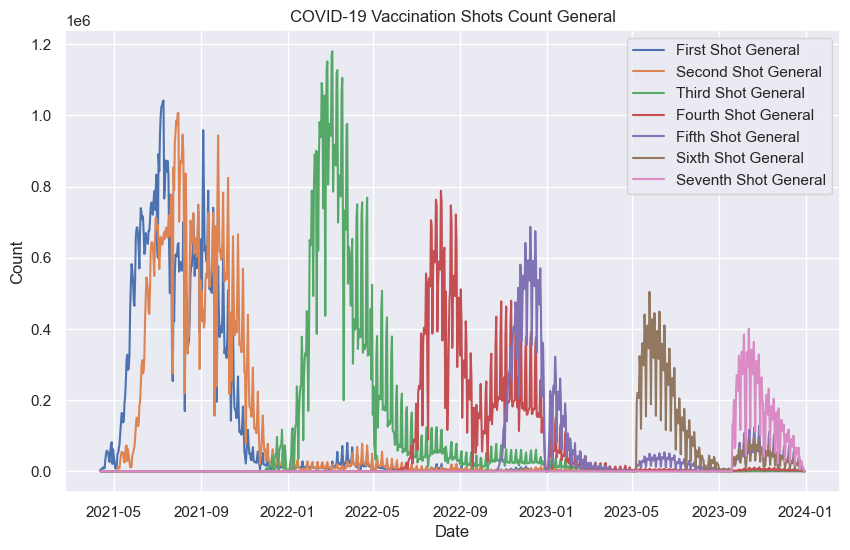

In [161]:
# グラフの描画
plt.figure(figsize=(10, 6))

# 各カウントの列に対応するデータをプロット
plt.plot(
    summary_by_date_data["date"],
    summary_by_date_data["count_first_shot_general"],
    label="First Shot General",
)
plt.plot(
    summary_by_date_data["date"],
    summary_by_date_data["count_second_shot_general"],
    label="Second Shot General",
)
plt.plot(
    summary_by_date_data["date"],
    summary_by_date_data["count_third_shot_general"],
    label="Third Shot General",
)
plt.plot(
    summary_by_date_data["date"],
    summary_by_date_data["count_fourth_shot_general"],
    label="Fourth Shot General",
)
plt.plot(
    summary_by_date_data["date"],
    summary_by_date_data["count_fifth_shot_general"],
    label="Fifth Shot General",
)
plt.plot(
    summary_by_date_data["date"],
    summary_by_date_data["count_sixth_shot_general"],
    label="Sixth Shot General",
)
plt.plot(
    summary_by_date_data["date"],
    summary_by_date_data["count_seventh_shot_general"],
    label="Seventh Shot General",
)

# データのラベル、タイトル、凡例などの設定
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Vaccination Shots Count General")
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()

In [162]:
# 'date'列を datetime 型に変換
newly_confirmed_cases_daily_data["date"] = pd.to_datetime(
    newly_confirmed_cases_daily_data["date"]
)
summary_by_date_data["date"] = pd.to_datetime(summary_by_date_data["date"])

# 'date'列を基準にして結合
merged_data = pd.merge(
    newly_confirmed_cases_daily_data[["date", "ALL"]],
    summary_by_date_data,
    on="date",
    how="left",
)

# DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Int64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>)
# というエラーが出たので、以下のように修正
merged_data["date"] = pd.to_datetime(merged_data["date"])


# 欠損値を 0 に置換
merged_data = merged_data.dropna()

# 結合結果を表示
merged_data

,date,ALL,count_first_shot_general,count_second_shot_general,count_third_shot_general,count_fourth_shot_general,count_fifth_shot_general,count_sixth_shot_general,count_seventh_shot_general,count_first_shot_general_wo_deceased,count_second_shot_general_wo_deceased,count_third_shot_general_wo_deceased,count_fourth_shot_general_wo_deceased,count_fifth_shot_general_wo_deceased,count_sixth_shot_general_wo_deceased,count_seventh_shot_general_wo_deceased
452,2021-04-12,2082,4742.0,0.0,0.0,0.0,0.0,0.0,0.0,3512.0,0.0,0.0,0.0,0.0,0.0,0.0
453,2021-04-13,3438,4352.0,0.0,0.0,0.0,0.0,0.0,0.0,2960.0,0.0,0.0,0.0,0.0,0.0,0.0
454,2021-04-14,4298,5352.0,0.0,0.0,0.0,0.0,0.0,0.0,4100.0,0.0,0.0,0.0,0.0,0.0,0.0
455,2021-04-15,4564,8936.0,0.0,0.0,0.0,0.0,0.0,0.0,7132.0,0.0,0.0,0.0,0.0,0.0,0.0
456,2021-04-16,4517,10936.0,0.0,0.0,0.0,0.0,0.0,0.0,9518.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2023-05-04,7303,30.0,32.0,254.0,409.0,167.0,0.0,0.0,30.0,32.0,254.0,409.0,167.0,0.0,0.0
1205,2023-05-05,5793,48.0,71.0,403.0,616.0,280.0,0.0,0.0,48.0,71.0,403.0,616.0,280.0,0.0,0.0
1206,2023-05-06,6257,311.0,630.0,3515.0,6478.0,2038.0,0.0,0.0,311.0,630.0,3515.0,6478.0,2038.0,0.0,0.0
1207,2023-05-07,14344,69.0,109.0,783.0,1147.0,433.0,0.0,0.0,69.0,109.0,783.0,1147.0,433.0,0.0,0.0


従属変数と独立変数(SAT)を定義

In [164]:
y = merged_data["ALL"]
x1 = merged_data["count_first_shot_general"]

散布図を描画

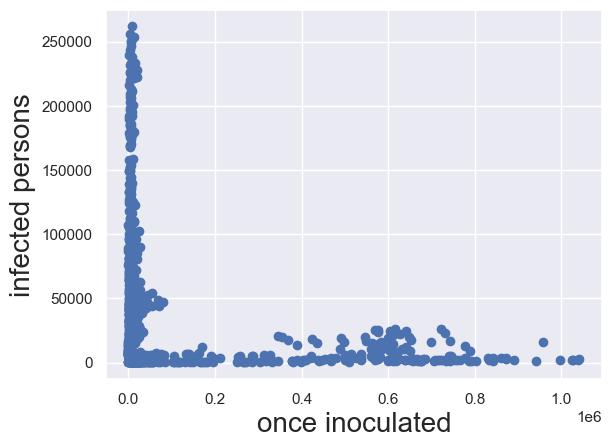

In [165]:
plt.scatter(x1, y, color="C0")
plt.xlabel("once inoculated", fontsize=20)
plt.ylabel("infected persons", fontsize=20)
plt.show()

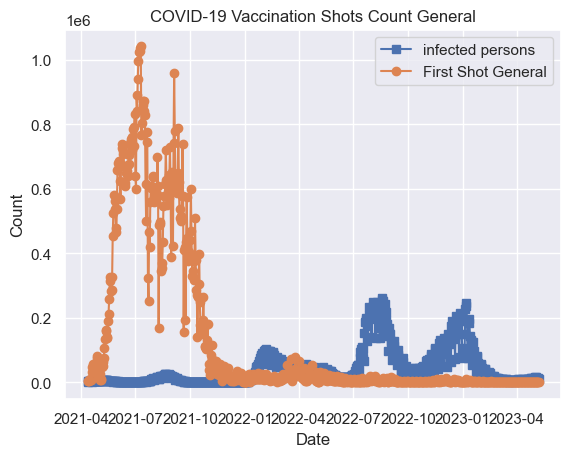

In [173]:
# 各変数を一つのグラフにまとめてプロット
plt.plot(merged_data["date"], merged_data["ALL"], label="infected persons", marker="s")
plt.plot(
    merged_data["date"],
    merged_data["count_first_shot_general"],
    label="First Shot General",
    marker="o",
)

# データのラベル、タイトル、凡例などの設定
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Vaccination Shots Count General")

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()